## Step 1: Import relevant packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Step 2: Import the csv file into a dataframe using Pandas

In [2]:
df = pd.read_csv('model2_devc.csv')

In [3]:
df.head()

,s,m3/s,m3/s.1,C,C.1,C.2
0,Time,E_01,E_02,TMP_01,TMP_02,TMP_03
1,0.0000000E+000,0.0000000E+000,0.0000000E+000,2.0000000E+001,2.0000000E+001,2.0000000E+001
2,1.0016105E+000,-2.2244965E-003,-1.1122483E-003,2.0000900E+001,1.9999987E+001,2.0000040E+001
3,2.0148392E+000,-1.2127648E-002,-6.0638240E-003,2.0130957E+001,2.0006259E+001,2.0004541E+001
4,3.0184203E+000,-3.2411738E-002,-1.6205869E-002,1.6090870E+002,2.0034671E+001,2.0032868E+001


## Step 3: Rename the column names and reset the dataframe by removing row 0

In [4]:
# create a copy of the dataframe
df1 = df.copy()

# copy row 0 of df to header of df1
df1.columns=df.iloc[0]

# drop top row
df1=df1[1:].reset_index(drop=True)
df1.head()

,Time,E_01,E_02,TMP_01,TMP_02,TMP_03
0,0.0000000E+000,0.0000000E+000,0.0000000E+000,2.0000000E+001,2.0000000E+001,2.0000000E+001
1,1.0016105E+000,-2.2244965E-003,-1.1122483E-003,2.0000900E+001,1.9999987E+001,2.0000040E+001
2,2.0148392E+000,-1.2127648E-002,-6.0638240E-003,2.0130957E+001,2.0006259E+001,2.0004541E+001
3,3.0184203E+000,-3.2411738E-002,-1.6205869E-002,1.6090870E+002,2.0034671E+001,2.0032868E+001
4,4.0262761E+000,-6.2951635E-002,-3.1475818E-002,2.0843028E+002,2.0071975E+001,2.0071255E+001


## Step 4: Convert datatype to float

In [5]:
df2 = df1.astype(float)
df2.head()

,Time,E_01,E_02,TMP_01,TMP_02,TMP_03
0,0.000000,0.000000,0.000000,20.000000,20.000000,20.000000
1,1.001610,-0.002224,-0.001112,20.000900,19.999987,20.000040
2,2.014839,-0.012128,-0.006064,20.130957,20.006259,20.004541
3,3.018420,-0.032412,-0.016206,160.908700,20.034671,20.032868
4,4.026276,-0.062952,-0.031476,208.430280,20.071975,20.071255


## Step 5: Filter Only Temperature Devices To Create a New DataFrame

#### Method 1

##### This method is useful when there are a lot of devices in the columns

In [6]:
# extract column names to a variable
columns = df2.columns
columns

Index(['Time', 'E_01', 'E_02', 'TMP_01', 'TMP_02', 'TMP_03'], dtype='object', name=0)

In [7]:
# filtering using device name starting with 'TMP'
temp_columns = []
for x in columns:
    if x.startswith('TMP'):
        temp_columns.append(x)
temp_columns

['TMP_01', 'TMP_02', 'TMP_03']

In [8]:
#generate a dataframe using only the filetered data
df3 = df2[temp_columns]

In [9]:
df3.head()

,TMP_01,TMP_02,TMP_03
0,20.000000,20.000000,20.000000
1,20.000900,19.999987,20.000040
2,20.130957,20.006259,20.004541
3,160.908700,20.034671,20.032868
4,208.430280,20.071975,20.071255


In [10]:
# create a dataframe with only time column data 
df4 = df2[['Time']]
df4.head()

,Time
0,0.000000
1,1.001610
2,2.014839
3,3.018420
4,4.026276


In [11]:
# concatitate two dataframes 
df5 = pd.concat([df3, df4], axis=1)

In [12]:
df5

,TMP_01,TMP_02,TMP_03,Time
0,20.000000,20.000000,20.000000,0.000000
1,20.000900,19.999987,20.000040,1.001610
2,20.130957,20.006259,20.004541,2.014839
3,160.908700,20.034671,20.032868,3.018420
4,208.430280,20.071975,20.071255,4.026276
...,...,...,...,...
96,35.824112,34.696411,43.253300,96.002833
97,32.346107,34.975488,57.450528,97.013442
98,43.318237,32.605075,59.236638,98.009817
99,29.963408,30.416270,48.867147,99.006192


#### Method 2

##### This method is useful when there are only a few devices

In [13]:
# manually create a new dataframe with relevant info required from df2
df6 = df2[['Time','TMP_01','TMP_02','TMP_03']]

In [14]:
df6

,Time,TMP_01,TMP_02,TMP_03
0,0.000000,20.000000,20.000000,20.000000
1,1.001610,20.000900,19.999987,20.000040
2,2.014839,20.130957,20.006259,20.004541
3,3.018420,160.908700,20.034671,20.032868
4,4.026276,208.430280,20.071975,20.071255
...,...,...,...,...
96,96.002833,35.824112,34.696411,43.253300
97,97.013442,32.346107,34.975488,57.450528
98,98.009817,43.318237,32.605075,59.236638
99,99.006192,29.963408,30.416270,48.867147


## Step 6: Generate the graph using Pandas plot function and update the legends and axes with Matplotlib function. 

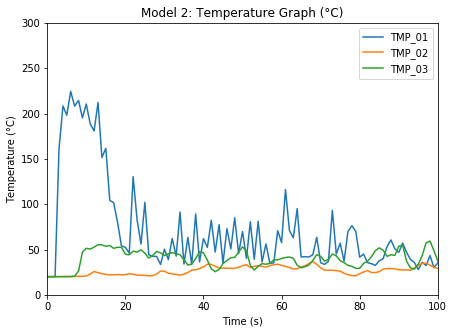

In [15]:
fig, ax = plt.subplots()

df6.plot(x='Time', y=['TMP_01','TMP_02','TMP_03'], title = 'Model 2: Temperature Graph (°C)', figsize=(7,5), ax=ax) 


# label x and y axis
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')


# specify limits for x and y axis
plt.xlim(0,100)
plt.ylim(0,300)

ax.legend()


# specify file name for the image and generate the graph
plt.savefig('Model2_Temp.png', bbox_inches='tight')
plt.show()